###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2020 Adam Wickenheiser

# Analyzing the Peaks of Data

In this notebook, we'll look at how to analyze a set of data based on its peaks, which are the places where it is locally a maximum.  This typically applies to periodic data, where you may want to determine its amplitude, frequency and/or period, and phase, among other things.

## Learning objectives:

1. To be able to locate and filter the peaks of a set of data
1. To be able to calculate the amplitude and frequency of a periodic set of data
1. To be able to calculate the phase difference between two signals of the same frequency
1. To be able to calculate the statistical uncertainty in these values and compare to the Law of Propagation of Uncertainty

## Contents:

1. [Finding the peaks of the data](#findpeaks)
1. [Calculating the amplitude, frequency, and period](#amp)
1. [Calculating phase difference between signals](#phase)
1. [Uncertainty in peak analysis](#uncertainty)

<a id='findpeaks'></a>

### Finding the peaks of the data
Before performing any calculations, we need to find where the peaks are in the data.  This could be a pretty tedious process, but luckily a function already exists for just this purpose!  To find the peaks, we will use the function [scipy.signal.find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html).  Check out the bottom of that webpage for some examples of usage.

First let's import the libraries we will need for this lesson.  We'll use find_peaks as well as [numpy](https://numpy.org/doc/stable/index.html) for math functions and [matplotlib.pyplot](https://matplotlib.org/2.0.2/index.html) for plotting:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Let's start with a simple set of position data $x(t)$ that has some peaks for us to detect.  We'll assume this data comes from a sensor that is sampled at a constant rate of 2 samples/second.

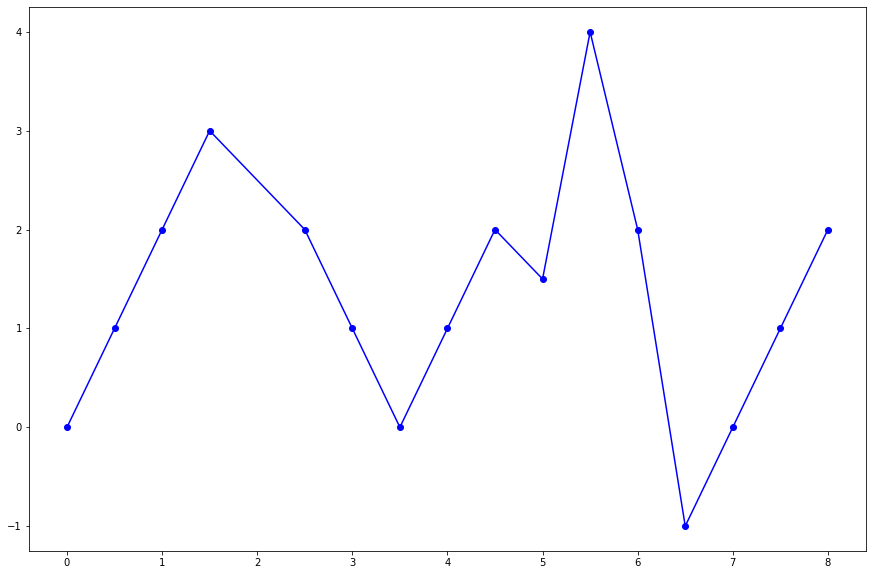

In [2]:
t = np.array([0.0, 0.5, 1.0, 1.5, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0])  # time array [s]
x = np.array([0.0, 1.0, 2.0, 3.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.5, 4.0, 2.0, -1.0, 0.0, 1.0, 2.0]) # position array [s]

plt.figure(figsize=(15,10))
plt.plot(t,x,'b-o');          # plot blue line with dot markers

Okay, let's use the find_peaks function to detect and plot the peaks of this data.

The indices of the peaks are: [ 3  8 10]
The peaks occur at times: [1.5 4.5 5.5]
The data values at the peaks are: [3. 2. 4.]


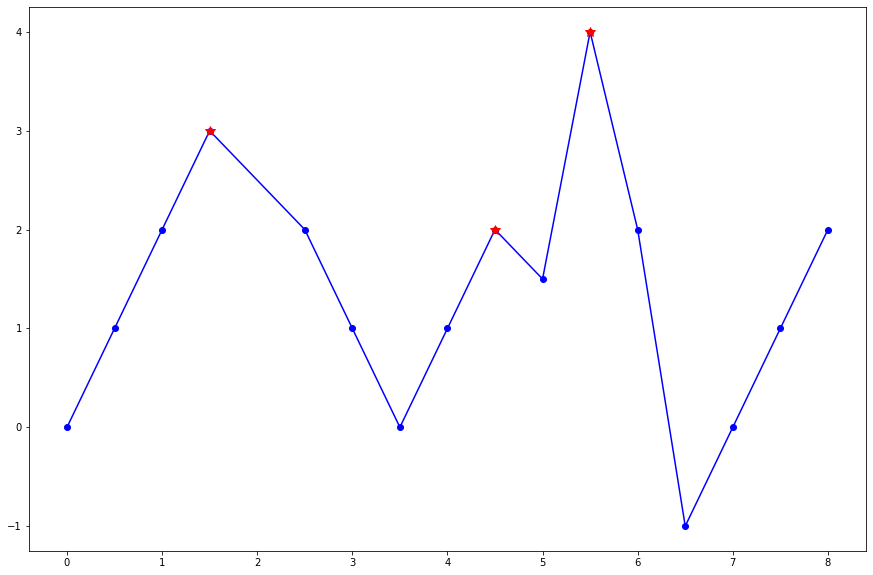

In [3]:
ind,_ = find_peaks(x)         # the ,_ means we only want the first output of the find_peaks function
plt.figure(figsize=(15,10))
plt.plot(t,x,'b-o')                       # plot the original data again
plt.plot(t[ind],x[ind],'r*',ms=10)        # plot the peaks as red stars

print('The indices of the peaks are:',ind)
print('The peaks occur at times:',t[ind])
print('The data values at the peaks are:',x[ind])

Note that the indices returned by the find_peaks start at 0 and increase to the length of the data set.  They are always integers and have no physical meaning other than the order of the data points.  The expression `t[ind]` returns the *times* at which those peaks occur, measured in seconds or milliseconds or whatever units your data's time stamps are in.  Finally, `x[ind]` gives the actual values (or heights) of the peaks.

Let's look at a longer set of data with more peaks and demonstrate some of the filtering options.

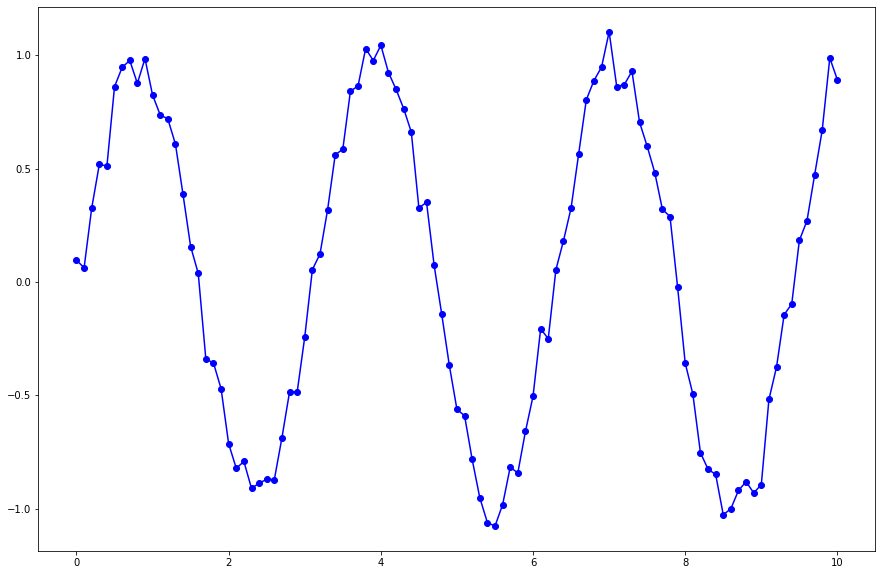

In [4]:
t = np.arange(0,10.1,0.1)
x = np.sin(2*t)+0.75*np.random.normal(0,0.1,t.shape)      # sine wave with additive Gaussian noise

plt.figure(figsize=(15,10))
plt.plot(t,x,'b-o');

This kind of signal is typical of a noisy sensor or a system experiencing vibrations or friction, causing a jerky motion.  Let's apply the same code as before to detect and plot the peaks:

The indices of the peaks are: [ 3  7  9 22 25 28 38 40 46 57 61 70 73 88 99]
The peaks occur at times: [0.3 0.7 0.9 2.2 2.5 2.8 3.8 4.  4.6 5.7 6.1 7.  7.3 8.8 9.9]
The data values at the peaks are: [ 0.51834754  0.97688833  0.98495901 -0.7908502  -0.86943103 -0.48419076
  1.02927234  1.04351325  0.35201994 -0.81588184 -0.20618051  1.1025633
  0.92887186 -0.87989522  0.98745356]


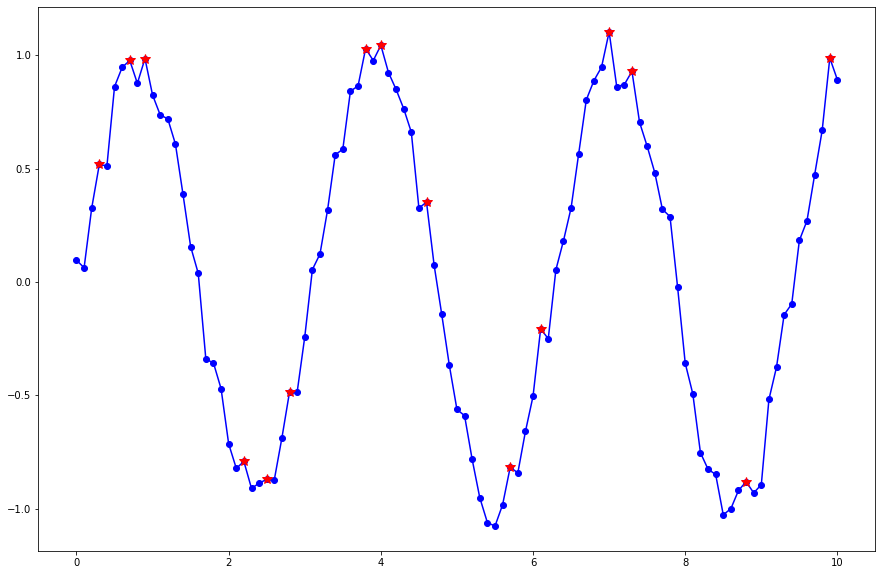

In [5]:
ind,_ = find_peaks(x)         # the ,_ means we only want the first output of the find_peaks function
plt.figure(figsize=(15,10))
plt.plot(t,x,'b-o')                       # plot the original data again
plt.plot(t[ind],x[ind],'r*',ms=10)        # plot the peaks as red stars

print('The indices of the peaks are:',ind)
print('The peaks occur at times:',t[ind])
print('The data values at the peaks are:',x[ind])

You can see here that the `find_peaks` function is literally finding every "peak", even the small peaks due to noise that we probably don't want.  Usually we only want the most prominent peaks that correspond to the underlying signal and not the noise.

First, let's eliminate any peaks with a negative value; this is done using the `heights` option:

The indices of the peaks are: [ 3  7  9 38 40 46 70 73 99]
The peaks occur at times: [0.3 0.7 0.9 3.8 4.  4.6 7.  7.3 9.9]
The data values at the peaks are: [0.51834754 0.97688833 0.98495901 1.02927234 1.04351325 0.35201994
 1.1025633  0.92887186 0.98745356]


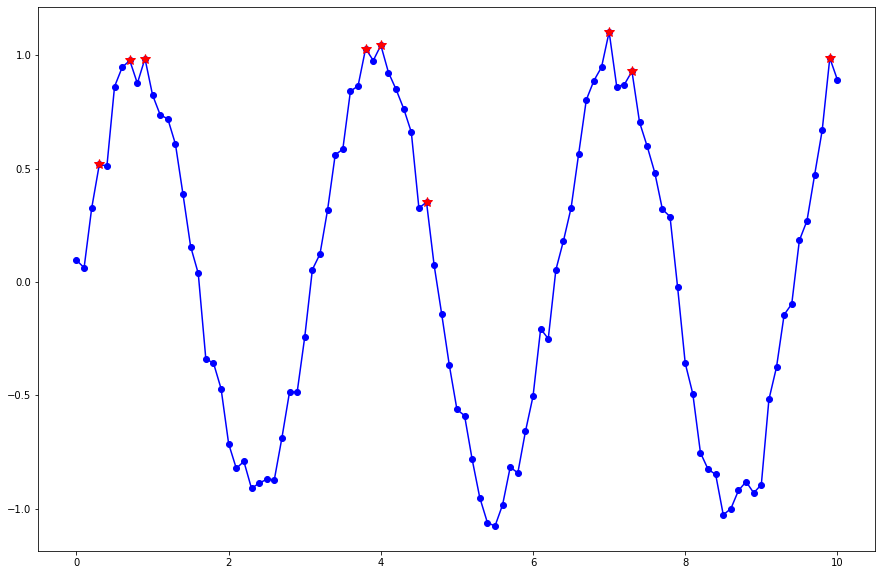

In [6]:
ind,_ = find_peaks(x,height=0.0)          # the ,_ means we only want the first output of the find_peaks function
plt.figure(figsize=(15,10))
plt.plot(t,x,'b-o')                       # plot the original data again
plt.plot(t[ind],x[ind],'r*',ms=10)        # plot the peaks as red stars

print('The indices of the peaks are:',ind)
print('The peaks occur at times:',t[ind])
print('The data values at the peaks are:',x[ind])

This still captures some of the noise on the positive portions of the data.  One way to pick out only the greatest of the peaks is to calculate their [prominence](https://en.wikipedia.org/wiki/Topographic_prominence), which is a measure of how high the peaks are compared to their surrounding valleys.  Scanning over the data plot, a prominence of 1.0 should eliminate the small peaks due to noise.

The indices of the peaks are: [40 70]
The peaks occur at times: [4. 7.]
The data values at the peaks are: [1.04351325 1.1025633 ]


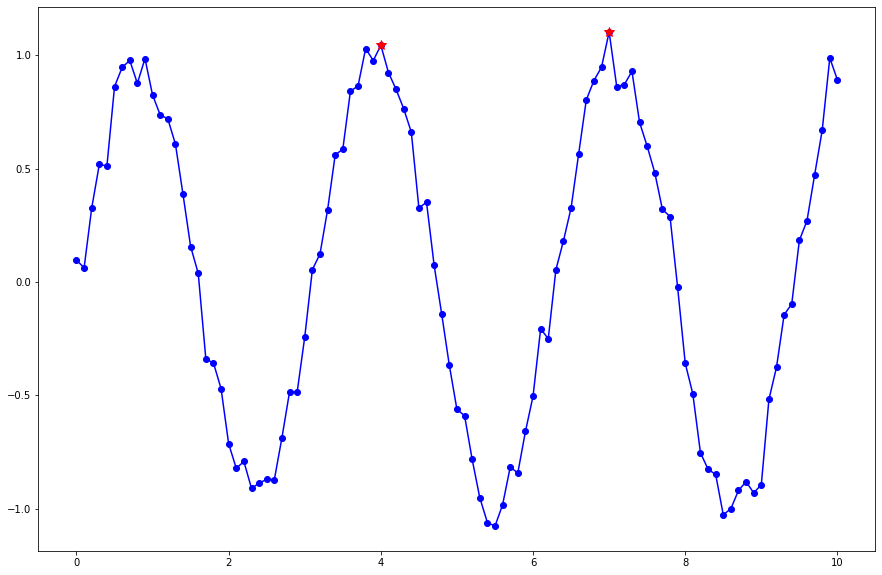

In [7]:
ind,_ = find_peaks(x,prominence=1.0)          # the ,_ means we only want the first output of the find_peaks function
plt.figure(figsize=(15,10))
plt.plot(t,x,'b-o')                       # plot the original data again
plt.plot(t[ind],x[ind],'r*',ms=10)        # plot the peaks as red stars

print('The indices of the peaks are:',ind)
print('The peaks occur at times:',t[ind])
print('The data values at the peaks are:',x[ind])

Depending on your application, you may want to combine these two filters (height and prominence), or use other methods for filtering (see the [find_peaks documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)).

<a id='amp'></a>

### Calculating the amplitude, frequency, and period

Now that we can find the peaks (and only the peaks we want), we can do some calculations using them.  Let's first calculate the amplitude of our data.  If the data were a perfect sine wave, and the sampling rate was infinitely fast, we'd only need one full cycle to determine the amplitude.  However, typical data is noisy to some extent, so each cycle will be a little bit different from the last.  Also, the sampling rate is finite, so it's possible to "miss" the true peak of the data (i.e. the peak may actually occur *between* two data points).  So it's best to average the amplitude over as many cycles as possible.

Here's the previous data set, just extended over a longer time interval.  We can calculate the average amplitude by calculating the average value of all the peaks, `x[ind]`.

Mean amplitude = 1.051903966763628


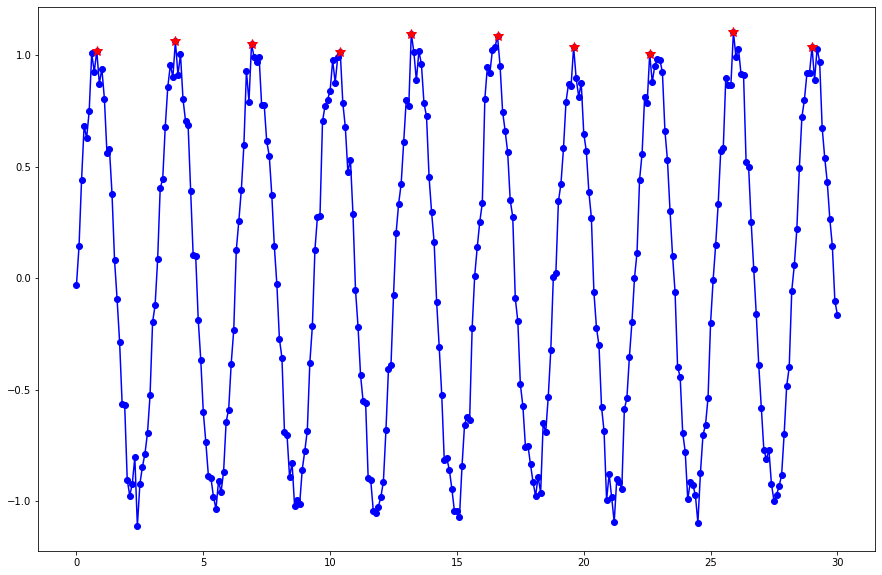

In [8]:
t = np.arange(0,30.1,0.1)
x = np.sin(2*t)+0.75*np.random.normal(0,0.1,t.shape)
ind,_ = find_peaks(x,prominence=1.0)          # the ,_ means we only want the first output of the find_peaks function
amp = np.mean(x[ind])

plt.figure(figsize=(15,10))
plt.plot(t,x,'b-o')
plt.plot(t[ind],x[ind],'r*',ms=10)        # plot the peaks as red stars

print('Mean amplitude =',amp)

The period of the data is the time span between subsequent peaks.  As with the amplitude calculation, it's best to average this calculation over as many cycles as possible.  To make this calculation easier to follow, we'll create a new array that stores the times at which the peaks occur.

In [9]:
t_peaks = t[ind]    # times when the peaks occur
period = np.mean(t_peaks[1:-1] - t_peaks[0:-2])  # array of differences between subsequent times in t_peaks array
freq = 1/period

print('Mean period =',period)
print('Mean frequency =',freq)

Mean period = 3.1375
Mean frequency = 0.3187250996015936


<a id='phase'></a>

### Calculating phase difference between signals

Two periodic data sets, even if they have the same frequency, may have a phase offset or shift between them.  Here's an example:

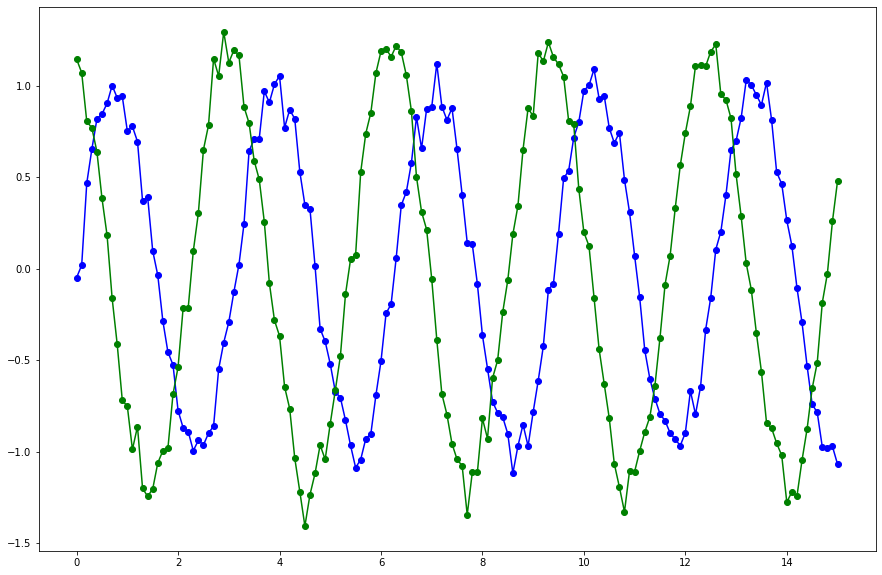

In [10]:
t = np.arange(0,15.1,0.1)
x = np.sin(2*t)+0.75*np.random.normal(0,0.1,t.shape)
y = 1.2*np.sin(2*t+1.8)+0.75*np.random.normal(0,0.1,t.shape)  # phase shift introduced by adding 1.8 to each sine term

plt.figure(figsize=(15,10))
plt.plot(t,x,'b-o',t,y,'g-o');

Phase shift is usually measured in degrees.  So if a signal is 180 degrees out of phase with another, then one will hit a peak while the other hits a valley, and vice versa.  Here's an example of a 180 degree phase shift:

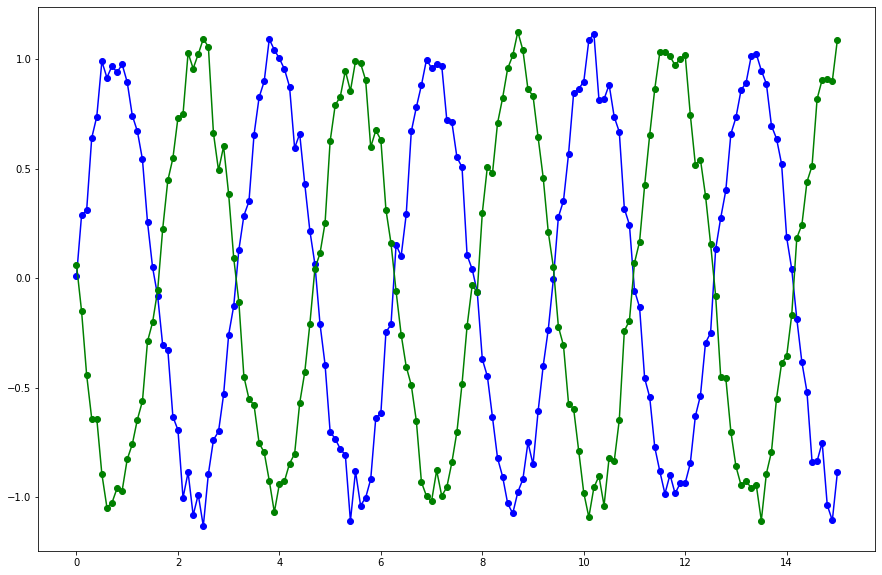

In [11]:
phs_shift = np.deg2rad(180.0)     # to add a phase shift to a sine term, it must be in radians

t = np.arange(0,15.1,0.1)
x = np.sin(2*t)+0.75*np.random.normal(0,0.1,t.shape)
y = np.sin(2*t+phs_shift)+0.75*np.random.normal(0,0.1,t.shape)

plt.figure(figsize=(15,10))
plt.plot(t,x,'b-o',t,y,'g-o');

Now, let's try to calculate the phase shift between two data sets.

Let's say one set of data is given by $x(t) = A \sin(\omega t + \phi_1)$ and another set of data is given by $y(t) = A \sin(\omega t + \phi_1)$.  Note that the frequency $\omega$ is the same between the two sets of data.  If the data were at different frequencies, then there would be no well defined phase between them.

The peaks occur when $\sin(\cdot) = 1$, which happens when the angle inside the parentheses is 90 degrees.  Let's say $x(t)$ has a peak at $t = t_1$ and $y(t)$ has a peak at $t = t_2$.  Then we get

$\omega t_1 + \phi_1 = 90^\circ = \omega t_2 + \phi_2$

so the phase difference is

$\phi_2 - \phi_1 = \omega (t_1 - t_2)$

Let's confirm this formula with an example:

Mean phase difference = -314.92063492063477


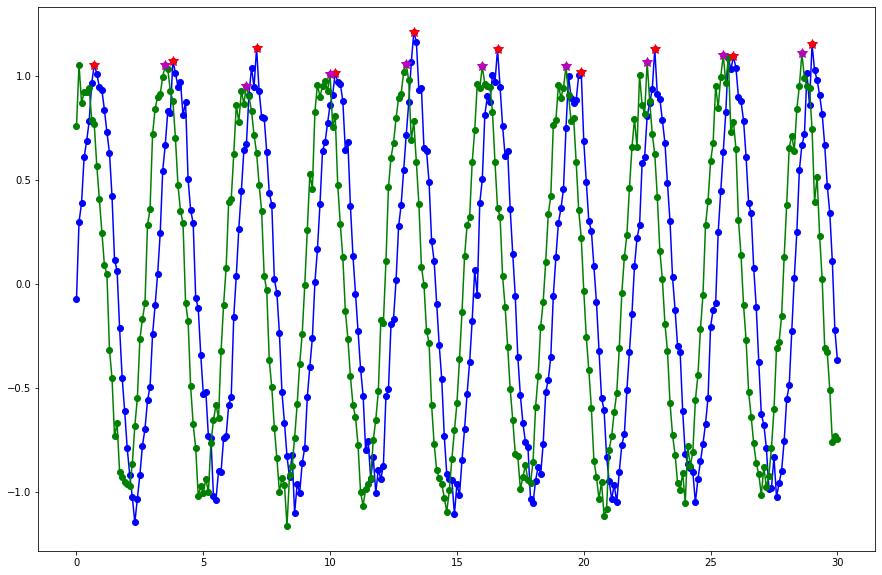

In [12]:
phs_shift = np.deg2rad(50.0)     # Let's put in a known phase of 50 deg. and see how close the calculated value is

t = np.arange(0,30.1,0.1)
x = np.sin(2*t)+0.75*np.random.normal(0,0.1,t.shape)
y = np.sin(2*t+phs_shift)+0.75*np.random.normal(0,0.1,t.shape)

ind1,_ = find_peaks(x,prominence=1.0)          # get peaks for x(t)
ind2,_ = find_peaks(y,prominence=1.0)          # get peaks for y(t)

plt.figure(figsize=(15,10))
plt.plot(t,x,'b-o',t,y,'g-o')
plt.plot(t[ind1],x[ind1],'r*',ms=10)        # plot the peaks of x(t) as red stars
plt.plot(t[ind2],y[ind2],'m*',ms=10)        # plot the peaks of y(t) as magenta stars

t_xpeaks = t[ind1]    # times when the x(t) peaks occur
period = np.mean(t_xpeaks[1:-1] - t_xpeaks[0:-2])  # array of differences between subsequent times in t_xpeaks array
freq = 360/period            # frequency in deg/s

t_ypeaks = t[ind2]    # times when the y(t) peaks occur

# to subtract t_ypeaks from t_xpeaks, we need to make sure these arrays are the same length
if t_xpeaks.size > t_ypeaks.size:
    t_xpeaks = t_xpeaks[0:t_ypeaks.size]  # t_xpeaks has more points than t_ypeaks, so trim t_xpeaks to match
elif t_ypeaks.size > t_xpeaks.size:
    t_ypeaks = t_ypeaks[0:t_xpeaks.size]  # t_ypeaks has more points than t_xpeaks, so trim t_ypeaks to match
phs = freq*np.average(t_xpeaks - t_ypeaks)

print('Mean phase difference =',phs)

You can see that the calculated phase difference is not the same as the theoretical value of $50^\circ$.  (If you're getting a negative value, add $360^\circ$ to it.)  Less noise and a faster sampling rate would improve the accuracy.  Of course, you may not be able to control either of these things in an actual experiment, in which case you just need more cycles of data to average over to improve accuracy.

To understand the effects of sampling rate on precision, let's look at how many samples there are per cycle.  A quick count by hand shows about 30 data points per cycle, which means the phase angle between each data point is roughly $360^\circ/30 samples = 12^\circ/sample$.  This means the phase calculation of a single cycle can be no more precise than $\pm 12^\circ$.  Averaging a large number of cycles would improve this precision.

The following code block is the same as the previous one, but with 10x the sampling rate.  If you run this block several times, you'll see less variance in the phase calculation.

Mean phase difference = -308.8165210484511


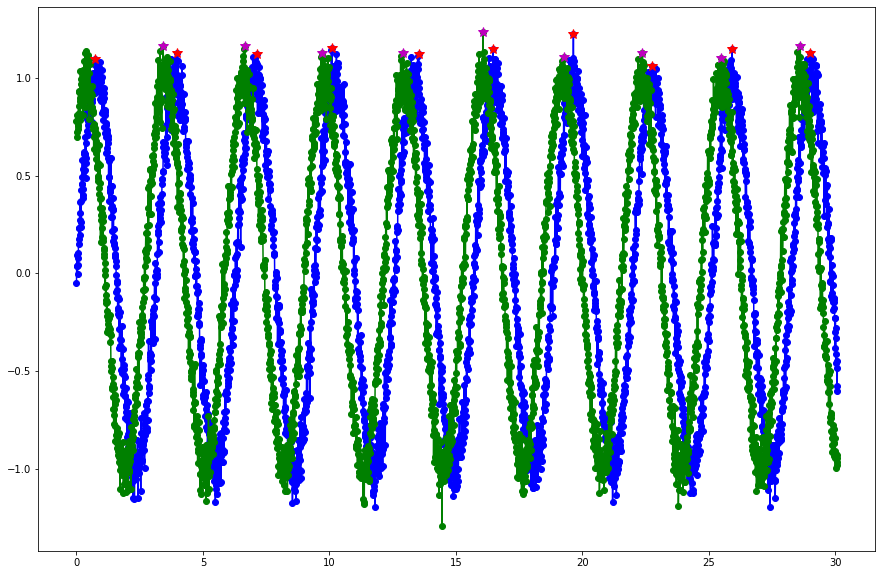

In [13]:
phs_shift = np.deg2rad(50.0)     # Let's put in a known phase of 50 deg. and see how close the calculated value is

t = np.arange(0,30.1,0.01)
x = np.sin(2*t)+0.75*np.random.normal(0,0.1,t.shape)
y = np.sin(2*t+phs_shift)+0.75*np.random.normal(0,0.1,t.shape)

ind1,_ = find_peaks(x,prominence=1.0)          # get peaks for x(t)
ind2,_ = find_peaks(y,prominence=1.0)          # get peaks for y(t)

plt.figure(figsize=(15,10))
plt.plot(t,x,'b-o',t,y,'g-o')
plt.plot(t[ind1],x[ind1],'r*',ms=10)        # plot the peaks of x(t) as red stars
plt.plot(t[ind2],y[ind2],'m*',ms=10)        # plot the peaks of y(t) as magenta stars

t_xpeaks = t[ind1]    # times when the x(t) peaks occur
period = np.mean(t_xpeaks[1:-1] - t_xpeaks[0:-2])  # array of differences between subsequent times in t_xpeaks array
freq = 360/period            # frequency in deg/s

t_ypeaks = t[ind2]    # times when the y(t) peaks occur

# to subtract t_ypeaks from t_xpeaks, we need to make sure these arrays are the same length
if t_xpeaks.size > t_ypeaks.size:
    t_xpeaks = t_xpeaks[0:t_ypeaks.size]
elif t_ypeaks.size > t_xpeaks.size:
    t_ypeaks = t_ypeaks[0:t_xpeaks.size]
phs = freq*np.average(t_xpeaks - t_ypeaks)

print('Mean phase difference =',phs)

<a id='uncertainty'></a>

### Uncertainty in peak analysis

The periodic signal you measure has some uncertainty associated with it.  Most likely it comes from a digitized electrical signal from a voltmeter, load cell, or strain gauge, for example.  The sensor itself may be digital, meaning it only can give one of a discrete set of values, for example an encoder.  In either case, you're dealing with finite precision (a finite number of decimal places) rather than infinite precision.

The following code gives an exaggerated example of this digitization phenominon:

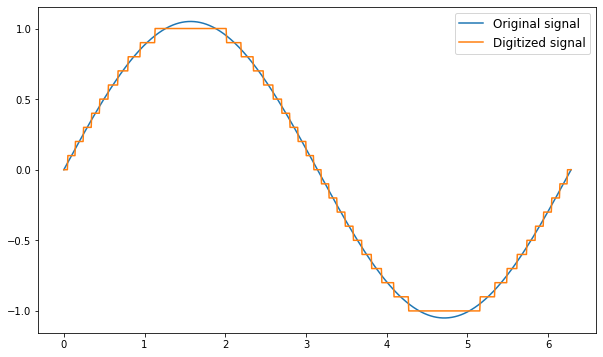

In [14]:
t = np.linspace(0,2*np.pi,1001)
x = 1.05*np.sin(t)
x_dig = np.around(x,1)         # x rounded to 1 decimal place

plt.figure(figsize=(10,6))
plt.plot(t,x,label='Original signal')
plt.plot(t,x_dig,label='Digitized signal')
plt.legend(fontsize=12);

So you can see here that the signal you measure (the digitized one) only matches the "true" signal at some points.

Another issue is that the data is not streaming into your computer continuously; there is a finite sampling rate for each measurement device, which limits the number of data points received per second.  As mentioned above, the true peak of your data cycle might occur between these samples, as the following code demonstrates (again, exaggerating):

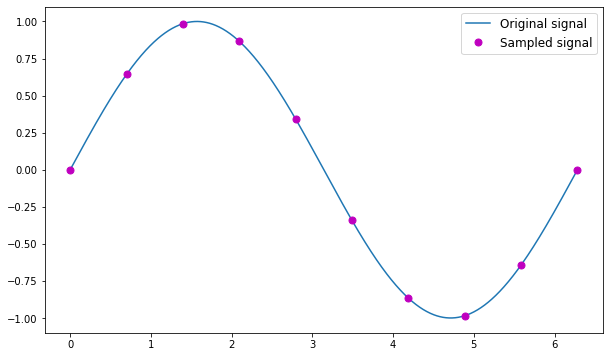

In [19]:
t = np.linspace(0,2*np.pi,1001)
x = np.sin(t)
t_samp = np.linspace(0,2*np.pi,10)     # greatly reduce the sampling rate
x_samp = np.sin(t_samp)

plt.figure(figsize=(10,6))
plt.plot(t,x,label='Original signal')
plt.plot(t_samp,x_samp,linestyle='None',marker='.',color='m',markersize=14,label='Sampled signal')
plt.legend(fontsize=12);

Note that the sampled data misses the true peak of what it's trying to measure, both in terms of height and when it occurs.

These two phenomena, the digitization of the data and the finite sampling rate, must be recorded as sources of **experimental uncertainty**.

1. For the first example, the sine wave is digitized to 1 decimal place, so we would say that the experimental uncertainty is $\pm 0.1$.

1. For the second example, the sampling period (time between samples) is $0.6s$ so the experimental uncertainty for time is $\pm 0.6 s$.

**Statistical uncertainty** is calculated directly from our data samples used in calculations.  Let's return to our previous example of calculating amplitude and period of a signal.

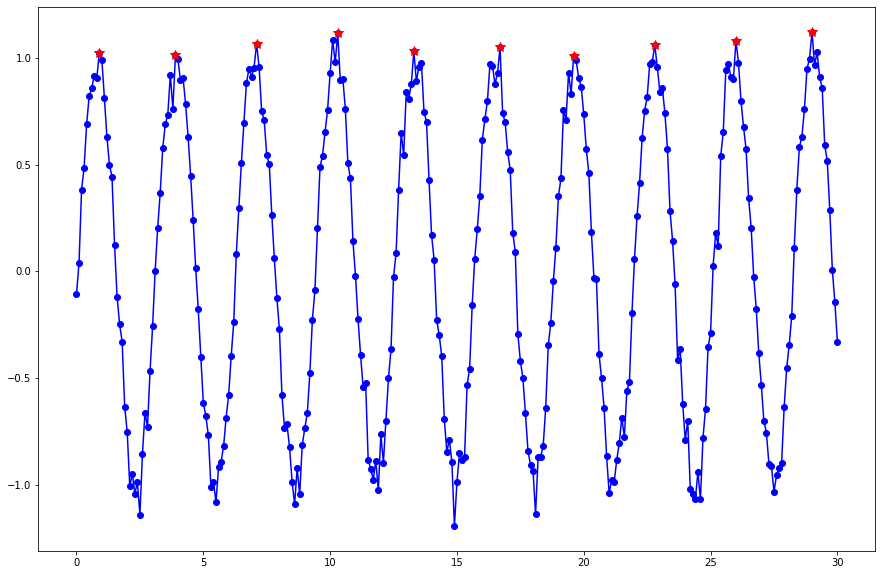

In [16]:
t = np.arange(0,30.1,0.1)
x = np.sin(2*t)+0.75*np.random.normal(0,0.1,t.shape)
ind,_ = find_peaks(x,prominence=1.0)          # the ,_ means we only want the first output of the find_peaks function
amp = np.mean(x[ind])

plt.figure(figsize=(15,10))
plt.plot(t,x,'b-o')
plt.plot(t[ind],x[ind],'r*',ms=10);        # plot the peaks as red stars

In [17]:
print('Mean amplitude =',np.mean(x[ind]))
print('Standard deviation of amplitude =',np.std(x[ind]))

t_peaks = t[ind]    # times when the peaks occur
t_diff = t_peaks[1:-1] - t_peaks[0:-2]  # array of differences between subsequent times in t_peaks array
freq = 1/period

print('Mean period =',np.mean(t_diff))
print('Standard deviation of period =',np.std(t_diff))

Mean amplitude = 1.0564010070941623
Standard deviation of amplitude = 0.037984212372032554
Mean period = 3.1375
Standard deviation of period = 0.14947825928876662


So we would report the statistical uncertainties for amplitude and period using these calculated standard devations.

Now, let's look at the frequency calcuation, which is not directly measured but is rather calculated from the period, which *is* directly measured.  The Law of Propagation of Uncertainty (LPU) should be able to predict the uncertainty in frequency, but we can also calculate it directly from our measurements.

To use the LPU, first write the formula for what you are calculating, in this case frequency:

$f = \dfrac{1}{T}$

then take partial derivatives in terms of each of the measured variables.  In this case, there's only period $T$:

$\dfrac{\partial f}{\partial T} = -\dfrac{1}{T^2}$

Therefore, the uncertainty in the frequency calculation is given by

$u_c(f) \approx \sqrt{\left( \dfrac{\partial f}{\partial T} \right)^2 u_c^2(T)} = \dfrac{1}{T^2} u_c(T)$

In [18]:
# uncertainty using LPU
period_std = np.std(t_diff)
period_mean = np.mean(t_diff)
freq_std = period_std/(period_mean**2)
print('Frequency mean from period mean =',1/period_mean)
print('Frequency uncertainty from LPU =',freq_std)

# uncertainty directly from calculations
freq_array = 1/t_diff
print('Frequency mean from frequency array =',np.mean(freq_array))
print('Frequency uncertainty from frequency array =',np.std(freq_array))

Frequency mean from period mean = 0.3187250996015936
Frequency uncertainty from LPU = 0.015184851977716326
Frequency mean from frequency array = 0.31945148749154834
Frequency uncertainty from frequency array = 0.015266195737693687


These numbers are pretty close, indicating the validity of the LPU.